In [ ]:
pip install opencv-python

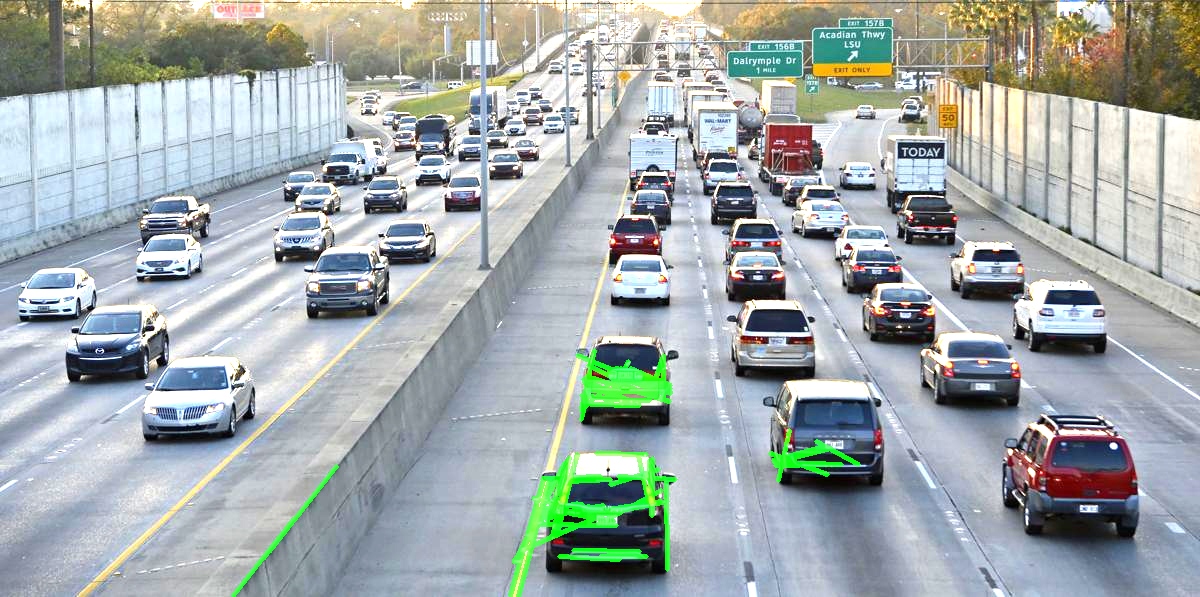

True

In [ ]:
# Import required libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Function to detect hurdles
def detect_hurdles(image):
    # Convert the color image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply gaussian blur to reduce noise in the gray scale image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Define the region of interest (ROI) to detect hurdles
    height, width = image.shape[:2]
    vertices = np.array([[(100, height), (width/2 - 50, height/2 + 50), (width/2 + 50, height/2 + 50), (width - 100, height)]], dtype=np.int32)

    # Create a blank mask
    mask = np.zeros_like(edges)

    # Fill the polygon defined by vertices with white color on the blank mask
    cv2.fillPoly(mask, vertices, 255)

    # Apply the mask to the Canny edges
    masked_edges = cv2.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    rho = 2
    theta = np.pi / 180
    threshold = 15
    min_line_length = 40
    max_line_gap = 20

    # Detect straight lines using Hough transform
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

    # Create a blank image to draw the detected lines
    line_image = np.copy(image)

    # Draw the detected lines on the blank image
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Overplay the line_image on the original color image
    result = cv2.addWeighted(image, 0.8, line_image, 1, 0)

    return result

# Load the image
image = cv2.imread('road_image.jpg')

# Detect hurdles on the road
result = detect_hurdles(image)

# Display the result
cv2_imshow(result)

# Save the result image
cv2.imwrite('hurdle_detection.png', result)